# Access and Analyse Contents of Textfiles

- Author:      Johannes Maucher
- Last update: 2020-09-09

In this notebook some important Python string methods are applied. This [Python string method docu](https://www.programiz.com/python-programming/methods/string/encode) provides a compact overview. 

## Character Encoding
![encoding](https://maucher.home.hdm-stuttgart.de/Pics/encodings.png)

In contrast to Python 2.x in Python 3.y strings are stored as unicode, i.e. each string is a sequence of unicode code points. Unicode supports more than 1 million characters. Each character is represented by a *code point*.

For the efficient storage of strings they are encoded. 
* A ``str`` can be encoded into ``bytes`` using the ``encode()`` method.
* ``bytes`` can be decoded to ``str`` using the ``decode()`` method.

Both methods accept a parameter, which is the encoding used to encode or decode. The default for both is *UTF-8*.

The following code cells demonstrate the difference between strings and bytes:

In [1]:
s1="die tür ist offen"
print(s1) #print string
print(type(s1))
b1=s1.encode('utf-8')
print("After utf-8 encoding: ",b1)
print(type(b1))
b2=s1.encode('latin-1')
print("After latin-1 encoding: ",b2)
print(type(b2))

die tür ist offen
<class 'str'>
After utf-8 encoding:  b'die t\xc3\xbcr ist offen'
<class 'bytes'>
After latin-1 encoding:  b'die t\xfcr ist offen'
<class 'bytes'>


In [2]:
print("Wrong decoding: ",b1.decode("latin-1"))
print(b2.decode("latin-1"))
print(b1.decode("utf-8"))
#print(b2.decode("utf-8"))

Wrong decoding:  die tÃ¼r ist offen
die tür ist offen
die tür ist offen


## Textfile from local machine 
### Read in row by row
The following code snippet demonstrates how to import text from a file, which is specified by its path and filename. The example text file is [ZeitOnlineLandkartenA.txt](../Data/ZeitOnlineLandkartenA.txt). 
In this first snippet the text in the file is read line by line. Each line is stored into a single string variable. The string variables of all lines are stored in a Python list. 

In [3]:
filename="../Data/ZeitOnlineLandkartenA.txt"
listOfLines=[]
with open(filename,"r",encoding="latin-1") as fin:
    for line in fin:
        line = line.strip()
        print(line)
        listOfLines.append(line)
print("Number of Lines:  ",len(listOfLines))

Landkarten mit Mehrwert
Ob als Reiseführer, Nachrichtenkanal oder Bürgerinitiative: Digitale Landkarten lassen sich vielseitig nutzen.
ZEIT ONLINE stellt einige der interessantesten Dienste vor.

Die Zeit, in der Landkarten im Netz bloß der Routenplanung dienten, ist längst vorbei. Denn mit den digitalen Karten von Google Maps und der Open-Source-Alternative OpenStreetMap kann man sich spannendere Dinge als den Weg von A nach B anzeigen lassen. Über offene Programmschnittstellen (API) lassen sich Daten von anderen Websites mit dem Kartenmaterial verknüpfen oder eigene Informationen eintragen. Das Ergebnis nennt sich Mashup  ein Mischmasch aus Karten und Daten sozusagen. Die Bewertungscommunity Qype nutzt diese Möglichkeit schon lange, um Adressen und Bewertungen miteinander zu verknüpfen und mithilfe von Google Maps darzustellen. Auch Immobilienbörsen, Branchenbücher und Fotodienste kommen kaum noch ohne eigene Kartenfunktion aus. Dank der Integration von Geodaten in Smartphones werde

#### Questions
Run the cell above without setting the `encoding`-parameter in the `open()`-method. What happens? 
A list of codecs supported by python can be found [here](https://docs.python.org/2/library/codecs.html#standard-encodings).

### Read in text as a whole
The entire contents of the file can also be read as a whole and stored in a single string variable:

In [4]:
with open(filename,"r",encoding="latin-1") as fin:
    text=fin.read()
print(text[:300])
print("\nNumber of Characters in Text:  ",len(text))

Landkarten mit Mehrwert
Ob als Reiseführer, Nachrichtenkanal oder Bürgerinitiative: Digitale Landkarten lassen sich vielseitig nutzen. 
ZEIT ONLINE stellt einige der interessantesten Dienste vor.
 
Die Zeit, in der Landkarten im Netz bloß der Routenplanung dienten, ist längst vorbei. Denn mit den di

Number of Characters in Text:   2027


## Segmentation of text-string into words
The entire text, which is now stored in the single variable _text_ can be split into it's words by applying the `split()`-method. The words are stored in a list of strings (`wordlist`). The words in the wordlist may end with punctuation marks. These marks are removed by applying the python string-method `strip()`.

In [5]:
wordlist=text.split()
print("First 12 words of the list:\n",wordlist[:12])
cleanwordlist=[w.strip('().,:;!?-"').lower() for w in wordlist]
print("First 12 cleaned words of the list:\n",cleanwordlist[:12])
print("Number of tokens:                   ",len(cleanwordlist))
print("Number of different tokens (=size of vocabulary):  ",len(set(cleanwordlist)))

First 12 words of the list:
 ['Landkarten', 'mit', 'Mehrwert', 'Ob', 'als', 'Reiseführer,', 'Nachrichtenkanal', 'oder', 'Bürgerinitiative:', 'Digitale', 'Landkarten', 'lassen']
First 12 cleaned words of the list:
 ['landkarten', 'mit', 'mehrwert', 'ob', 'als', 'reiseführer', 'nachrichtenkanal', 'oder', 'bürgerinitiative', 'digitale', 'landkarten', 'lassen']
Number of tokens:                    267
Number of different tokens (=size of vocabulary):   187


## Textfile from Web

In [6]:
from urllib.request import urlopen
import nltk
import re

Download **Alice in Wonderland (Lewis Carol)** from [http://textfiles.com/etext](http://textfiles.com/etext):

In [7]:
print("-"*100)
print("-"*30+"1. Download Alice in Wonderland"+"-"*20)
urlAlice="http://textfiles.com/etext/FICTION/alice.txt"
#urlAlice="https://archive.org/stream/alicewonderlanda00carr/alicewonderlanda00carr_djvu.txt"
rawAlice=urlopen(urlAlice).read().decode("latin-1")

----------------------------------------------------------------------------------------------------
------------------------------1. Download Alice in Wonderland--------------------


In [8]:
print("First 4000 characters of downloaded text:\n",rawAlice[:4000])

First 4000 characters of downloaded text:
           PROJECT GUTENBERG AND DUNCAN RESEARCH SHAREWARE

                             (c)1991

Project Gutenberg has made arrangements with Duncan Research for
the distribution of Duncan Research Electronic Library text.  No
money is solicited by Project Gutenberg.  All donations go to:

Barbara  Duncan
Duncan Research
P.O.  Box  2782
Champaign,   IL
61825 - 2782

Please, if you send in a request for information, donate enough,
or more than enough to cover the cost of writing, printing, etc.
as well as the cost of postage.

This is Shareware, you may post it intact anywhere, as long as a
profit is not incurred.

As Shareware, no legal obligation is assumed by you to donate in
manners monetary or assistance in the creations or distributions
of electronic texts.  These files are claimed under copyright to
protect their integrity, therefore you are required to pass them
on intact, but you may make changes to your own copies.  We want
to know if

Save textfile in local directory:

In [9]:
fout=open("../Data/AliceEnglish.txt","w")
fout.write(rawAlice)
fout.close()

Read textfile from local directory:

In [10]:
with open("../Data/AliceEnglish.txt","r") as fin:
    rawAliceIn=fin.read()

In [11]:
print("Type of variable: ", type(rawAlice))
print("Number of characters in the book: ",len(rawAlice))

Type of variable:  <class 'str'>
Number of characters in the book:  150886


## Simple Methods to get a first impresson on text content

In a first analysis, we want to determine the most frequent words. This shall provide us a first impression on the text content. 
### Questions:
Before some simple text statistics methods (word-frequency) are implemented inspect the downloaded text. **What should be done in advance?** 

### Remove Meta-Text
The downloaded file does not only contain the story of *Alice in Wonderland*, but also some meta-information at the start and the end of the file. This meta-information can be excluded, by determining the true start and end of the story. The true start is at the phrase `CHAPTER I` and the true end is before the phrase `THE END`.

In [12]:
startText=rawAlice.find("CHAPTER I")
endText=rawAlice.find("THE END")
print(startText)
print(endText)
rawAlice=rawAlice[startText:endText]

2831
150878


### Tokenisation
Split the relevant text into a list of words:

In [13]:
aliceWords = [word.strip(u'?!.:",<>-»«') for word in rawAlice.lower().split()]

### Generate Vocabulary and determine number of words

In [14]:
numWordsAll=len(aliceWords)
print("Number of words in the book: ",numWordsAll)
aliceVocab = set(aliceWords)
numWordsVocab=len(aliceVocab)
print("Number of different words in the book: ",numWordsVocab)
print("In the average each word is used %2.2f times"%(float(numWordsAll)/numWordsVocab))

Number of words in the book:  26406
Number of different words in the book:  3815
In the average each word is used 6.92 times


### Determine Frequency of each word

In [15]:
wordFrequencies={}
for word in aliceVocab:
    wordFrequencies[word]=aliceWords.count(word)

Sort the word-frequency dictionary according to decreasing word-frequency.

In [16]:
for word in list(wordFrequencies.keys())[:10]:
    print(word, wordFrequencies[word])

opened 10
fanning 1
about; 1
lonely 2
want 9
alone 3
forgetting 3
shoes!' 1
stay 4
shall 22


In [17]:
print("40 most frequent words:\n")
for w in sorted(wordFrequencies, key=wordFrequencies.get, reverse=True)[:40]:
    print(w, wordFrequencies[w])

40 most frequent words:

the 1597
and 786
to 711
a 612
she 522
of 492
said 453
it 427
alice 361
in 350
was 349
you 300
i 272
as 251
her 242
that 233
at 206
on 182
had 176
with 170
all 166
very 139
be 139
for 138
so 135
but 126
little 126
this 124
not 120
`i 120
they 119
out 114
he 112
down 97
his 95
what 95
up 92
about 90
is 88
one 87


### Optimization by stop-word removal
Stopwords are words, with low information content, such as determiners (*the, a,* ...), conjunctions (*and, or,* ...), prepositions (*in, on, over,* ...) and so on. For typical information retrieval tasks stopwords are usually ignored. In the code snippet below, a stopword-list from [NLTK](http://www.nltk.org/) is applied in order to remove these non-relevant words from the document-word lists. NLTK provides stopwordlists for many different languages. Since our text is written in English, we apply the English stopwordlist:

In [18]:
from nltk.corpus import stopwords
stopwordlist=stopwords.words('english')
aliceWords = [word.strip(u'?!.:",<>-»« ') for word in rawAlice.lower().split() 
              if word.strip(u'?!.:",<>-»« ') not in stopwordlist] 

In [19]:
numWordsAll=len(aliceWords)
print("Number of words in the book: ",numWordsAll)
aliceVocab = set(aliceWords)
numWordsVocab=len(aliceVocab)
print("Number of different words in the book: ",numWordsVocab)
#print("In the average each word is used %2.2f times"%(float(numWordsAll)/numWordsVocab))

Number of words in the book:  13599
Number of different words in the book:  3667


Generate the dictionary for the cleaned text and display it in an ordered form: 

In [20]:
wordFrequencies={}
for word in aliceVocab:
    wordFrequencies[word]=aliceWords.count(word)

In [21]:
print("40 most frequent words:\n")
for w in sorted(wordFrequencies, key=wordFrequencies.get, reverse=True)[:40]:
    print(w, wordFrequencies[w])

40 most frequent words:

said 453
alice 361
little 126
`i 120
one 87
went 82
like 78
could 77
would 77
thought 72
queen 65
see 63
know 61
* 60
began 58
time 58
king 57
mock 55
quite 55
`and 54
gryphon 53
turtle 53
hatter 53
way 51
go 46
got 45
voice 45
looked 45
get 44
much 43
must 43
first 42
think 42
say 42
rabbit 41
never 41
thing 40
round 40
head 40
came 40


Another option to calculate the word frequencies in an ordered manner is to apply the `nltk`-class [FreqDist](http://www.nltk.org/api/nltk.html#nltk.probability.FreqDist). 

[('said', 453), ('alice', 361), ('little', 126), ('`i', 120), ('one', 87), ('went', 82), ('like', 78), ('could', 77), ('would', 77), ('thought', 72), ('queen', 65), ('see', 63), ('know', 61), ('*', 60), ('time', 58), ('began', 58), ('king', 57), ('quite', 55), ('mock', 55), ('`and', 54)]


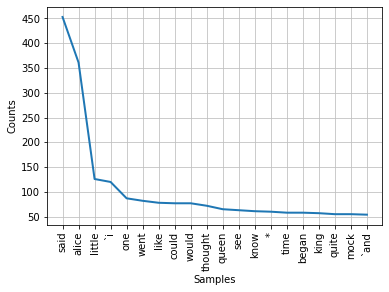

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
%matplotlib inline
fd=nltk.FreqDist(aliceWords)
print(fd.most_common(20))
fd.plot(20)